In [1]:
import numpy  as np

import matplotlib.pyplot as plt

from legendmeta import LegendMetadata #!pip install pylegendmeta
from datetime import datetime, timezone

from lgdo import LH5Store #!pip install legend-pydataobj
import lgdo.lh5_store as lh5

In [2]:
lmeta = LegendMetadata()#'/Users/romoluque_c/Repositories/legend-metadata/')

In [3]:
dt    = datetime(2023, 4, 22, 5, 54, 22, tzinfo=timezone.utc)
chmap = lmeta.hardware.configuration.channelmaps.on(dt)

In [4]:
def make_string_plottable(string_pos):
    if string_pos < 6:
        return string_pos - 1
    else:
        return string_pos - 2
    
def make_position_plottable(position_pos):
    return position_pos - 1

In [5]:
channel_dict = {}
for channel_name, channel_data in chmap.items():
    try:
        channel_dict[channel_data['daq']['rawid']] = (lmeta.channelmap(dt)[channel_name].type,
                                                      channel_name,
                                                      lmeta.channelmap(dt)[channel_name].production['mass_in_g'],
                                                      lmeta.channelmap(dt)[channel_name].location  ['string'],
                                                      lmeta.channelmap(dt)[channel_name].location  ['position'],
                                                      make_string_plottable  (lmeta.channelmap(dt)[channel_name].location['string']),
                                                      make_position_plottable(lmeta.channelmap(dt)[channel_name].location['position']))
    except:
        continue

### Channel location:

In [6]:
color_det_dict = {'icpc': 'teal'     ,
                  'coax': 'indianred',
                  'bege': 'orange'   ,
                  'ppc' : 'grey'     }

In [7]:
strings   = [val[3] for val in channel_dict.values()]
positions = [val[4] for val in channel_dict.values()]

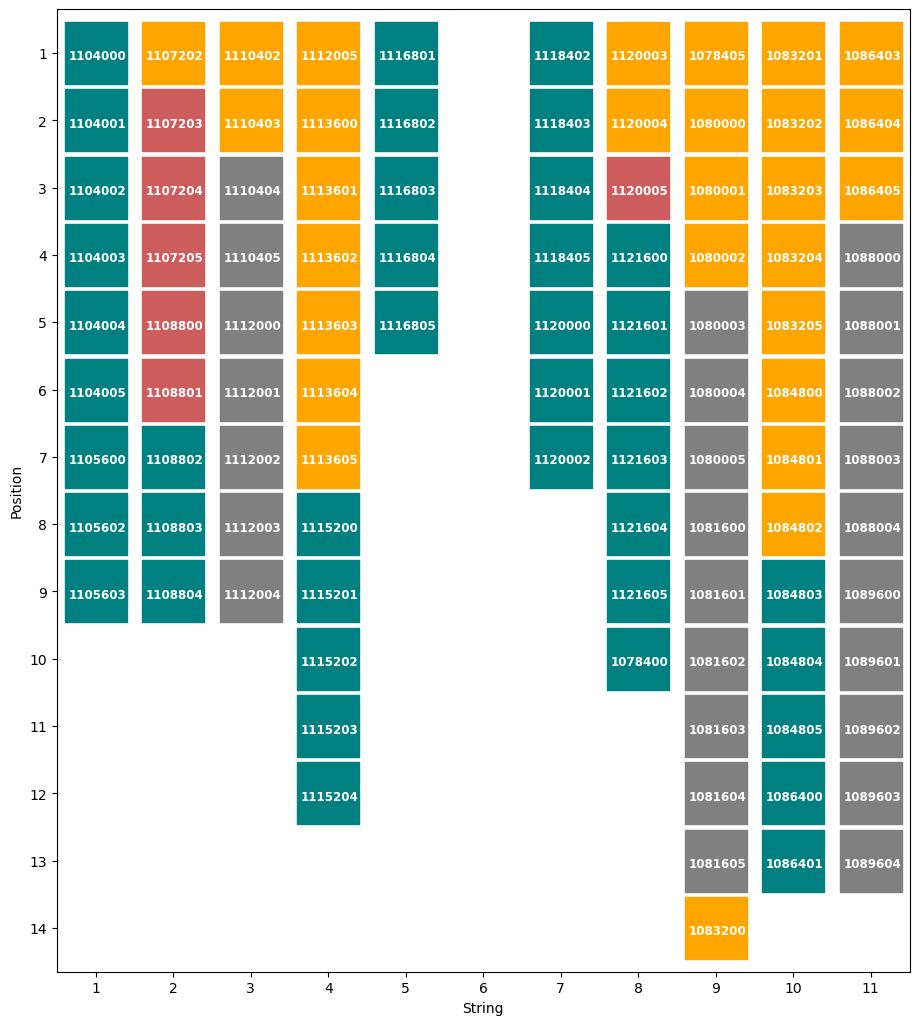

In [12]:
bin_width = 1
plt.figure(figsize=(11, 12.5))
for val in channel_dict.values():
    plt.scatter(val[3], val[4], label=val[0], marker='s', s=2000, color=color_det_dict[val[0]])
for k, v in channel_dict.items():
    plt.text(v[3]-0.35, v[4]+0.1, k, color='white', fontsize=8.5, weight='bold')
plt.xlabel('String')
plt.ylabel('Position')
plt.gca().invert_yaxis()
plt.xticks(np.arange(min(strings),   max(strings)   + 1, bin_width))
plt.yticks(np.arange(min(positions), max(positions) + 1, bin_width))
#plt.legend(loc='lower center', ncol=4)
plt.show()

### Waveform analysis

In [9]:
period    = 6
run       = 6
data_path = f"/pscratch/sd/r/romo/legend_data/l200/tier/raw/tst/p0{period}/r00{run}/"
wf_file   = data_path + "l200-p06-r006-tst-20230725T090913Z_all_ge.lh5"

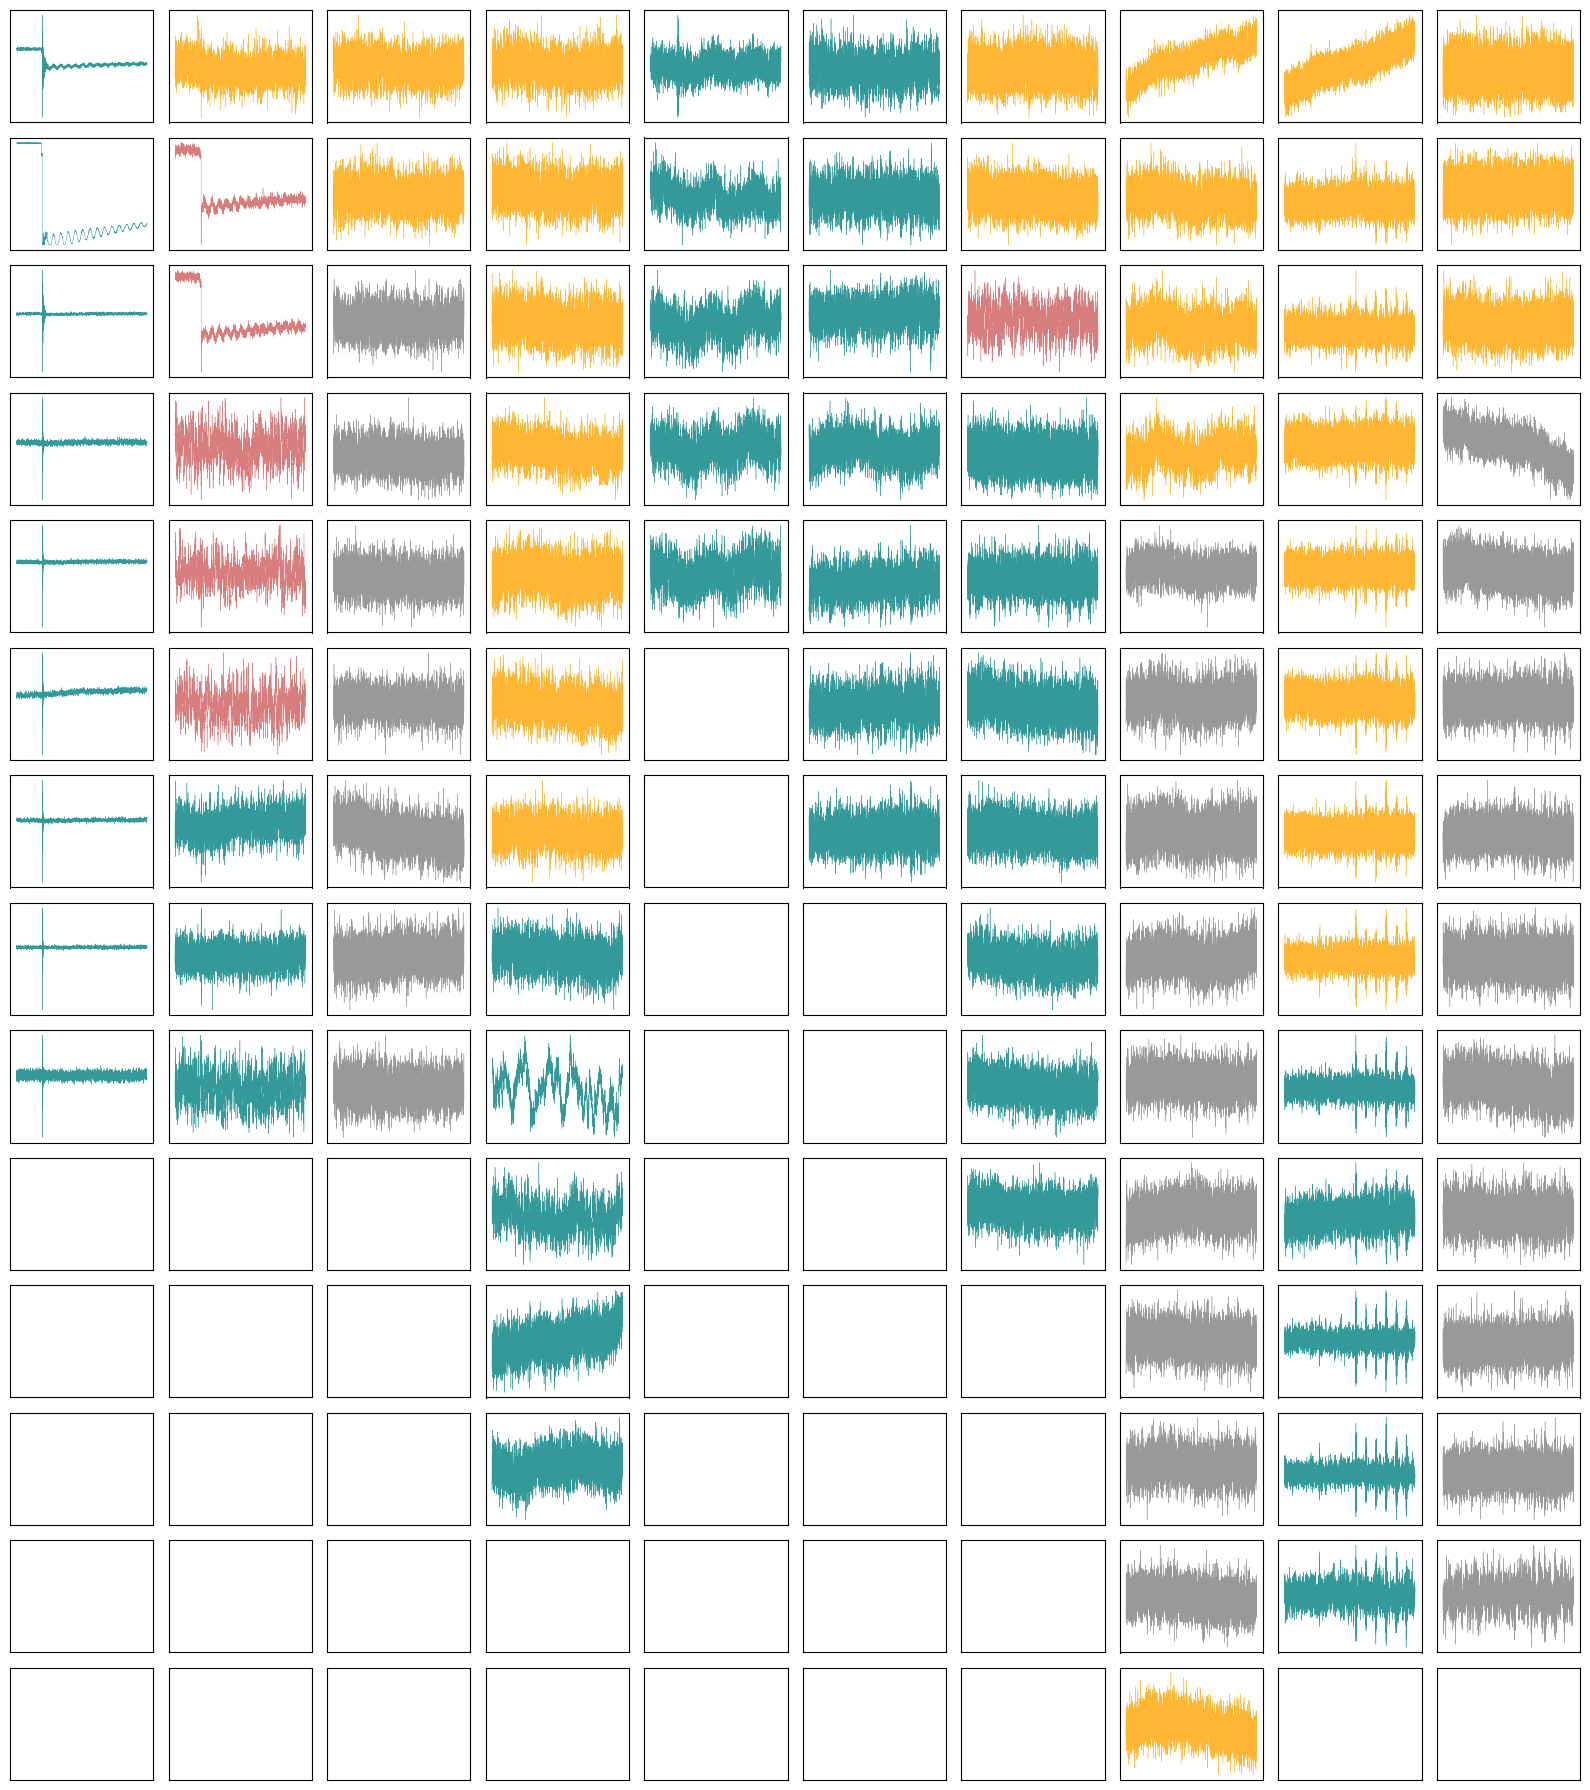

In [10]:
evt = 541
fig, axs = plt.subplots(max(positions), max(strings)-1, figsize=(16, 18))
for channel in channel_dict.keys():
    color = color_det_dict[channel_dict[channel][0]]        
    store = LH5Store()
    
    data_raw, n_tot = store.read_object(f'ch{channel}/raw/waveform', wf_file, n_rows=np.inf)
    axs[channel_dict[channel][6]][channel_dict[channel][5]].plot(np.arange(len(data_raw.values[evt])), 
                                                                 data_raw.values[evt], linewidth=0.3, alpha=0.8, color=color)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
#fig.savefig(f"/global/homes/r/romo/LEGEND/low_energy_thr/images/bad_evt_{evt}_all_ge.png", bbox_inches='tight')